In [4]:
from nptdms import TdmsFile as TF
import sys, os
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

In [109]:
import mhdpy

ModuleNotFoundError: No module named 'mhdpy'

In [5]:
def create_tcdict(filepaths, loadfn, prefix = None ):
    """takes in a list of files and a load function, and creates a dict of a df for each file. If a prefix is passed, that is removed from the filename (typically the instrument name so only the test case is left as the dict key)"""

    dfs = {}

    for filepath in filepaths:
        filename = os.path.split(filepath)[1]
        testcase = os.path.splitext(filename)[0]

        if prefix != None:
            testcase = _remove_prefix(testcase,prefix)

        df =  loadfn(filepath)
        dfs[testcase] =df
    
    return dfs

In [6]:
def ocop2df(filepath,):
    file = TF(filepath)
    df = file.object(file.groups()[2]).as_dataframe()
    df.index = file.object('Global', "Wavelength").data
    indexarr = list(zip(*[file.object('Global', 'MP Pos').data,file.object('Global', 'Time').data]))
    df.columns = pd.MultiIndex.from_tuples(indexarr, names = ['MP','Wavelength'])
    print(filepath)
    return df

In [16]:
T = [1039, 1050, 1145, 1180, 1200]
Spcm = ['Flame', 'NIRQuest512']
names = []
filenames = []
path = 'Z:\\Test Data\\Raw Data\\Materials Testing\\2018-10-15\\UnspecifiedProj\\Measure\\'
for t in T:
    for s in Spcm:
        names.append(s+'_'+str(t)+'C')
        filenames.append((path+s+'_'+str(t)+'C.tdms'))

In [10]:
dfs = create_tcdict(filenames, ocop2df)

C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\nptdms\tdms.py:772: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  for ch in self.tdms_file.group_channels(self.group)])


Z:\Test Data\Raw Data\Materials Testing\2018-10-15\UnspecifiedProj\Measure\Flame_1039C.tdms
Z:\Test Data\Raw Data\Materials Testing\2018-10-15\UnspecifiedProj\Measure\NIRQuest512_1039C.tdms
Z:\Test Data\Raw Data\Materials Testing\2018-10-15\UnspecifiedProj\Measure\Flame_1050C.tdms
Z:\Test Data\Raw Data\Materials Testing\2018-10-15\UnspecifiedProj\Measure\NIRQuest512_1050C.tdms
Z:\Test Data\Raw Data\Materials Testing\2018-10-15\UnspecifiedProj\Measure\Flame_1145C.tdms
Z:\Test Data\Raw Data\Materials Testing\2018-10-15\UnspecifiedProj\Measure\NIRQuest512_1145C.tdms
Z:\Test Data\Raw Data\Materials Testing\2018-10-15\UnspecifiedProj\Measure\Flame_1180C.tdms
Z:\Test Data\Raw Data\Materials Testing\2018-10-15\UnspecifiedProj\Measure\NIRQuest512_1180C.tdms
Z:\Test Data\Raw Data\Materials Testing\2018-10-15\UnspecifiedProj\Measure\Flame_1200C.tdms
Z:\Test Data\Raw Data\Materials Testing\2018-10-15\UnspecifiedProj\Measure\NIRQuest512_1200C.tdms


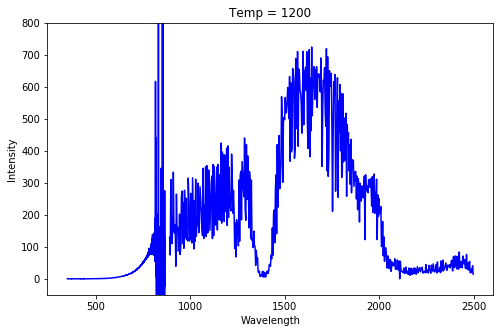

In [12]:
image = plt.figure(figsize=(8,5))
for temp in T:
    image.clear()
    plt.plot(dfs[Spcm[0]+'_'+str(temp)+'C'][0].mean(axis=1), c='b')
    plt.plot(dfs[Spcm[1]+'_'+str(temp)+'C'][1].mean(axis=1), c='b')
    plt.title('Temp = ' + str(temp))
    plt.ylabel('Intensity')
    plt.xlabel('Wavelength')
    plt.ylim(-50,800)
    image.savefig('MgO Black Body Curve T='+str(temp))

In [88]:
def twocolortemp(wl1,wl2,s):
    c2 = 14394264.78261
    wi1 = np.where(np.abs(s.index - wl1)<3.28)[0][0]
    wi2 = np.where(np.abs(s.index - wl2)<3.28)[0][0]
    e1 = np.mean(s.iloc[wi1-5:wi1+5])
    e2 = np.mean(s.iloc[wi2-5:wi2+5])
    num = c2*((1/wl1)-(1/wl2))
    den = -np.log(e1*wl1**5)+np.log(e2*wl2**5)
    #return e2
    return num/den

In [94]:
w=np.arange(900,1550,50)
bbt = np.zeros((len(w),5))
for i, wa in enumerate(w):
    wb = wa+150
    BBT = []
    for temp in T:
        s = dfs[Spcm[1]+'_'+str(temp)+'C'][1].mean(axis=1)
        BBT.append(twocolortemp(wa,wb,s))
    print(BBT)
    bbt[i] = BBT
#plt.plot(df.columns, T, label='PostMeas')
#plt.plot(, Trt['Color Temp 1-2'])
#plt.plot(Trt2['Time'], Trt2['Temp'+str(wa)+'-'+str(wb)], label='RealTime')
#plt.ylim(-100,3000)
#plt.xlim(8000,10000)
#plt.legend()

900 1050
[nan, nan, nan, nan, nan]
950 1100
[nan, nan, nan, nan, nan]
1000 1150
[nan, nan, nan, nan, nan]
1050 1200


C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encount

[-2450.89202242011, -2704.404507065443, -2365.336765905034, -2376.22487291266, -2137.981654134507]
1100 1250
[nan, nan, nan, nan, nan]
1150 1300
[nan, nan, nan, nan, nan]
1200 1350
[-4810.210634588567, -4640.516199869746, -4036.5937857776207, -3531.171421795587, -3884.3268576935484]
1250 1400


C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encount

[nan, nan, nan, nan, nan]
1300 1450
[nan, nan, nan, nan, nan]
1350 1500
[nan, nan, nan, nan, nan]
1400 1550
[nan, nan, nan, nan, nan]
1450 1600


C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encount

[nan, nan, nan, nan, nan]
1500 1650
[nan, nan, nan, nan, nan]


C:\Users\bowenm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


In [107]:
for temp in T:
    s = dfs[Spcm[1]+'_'+str(temp)+'C'][1].mean(axis=1)
    print(twocolortemp(1000,1150,s))

1736.671576231148
1641.3628212894862
1901.5345279442492
1641.921437228604
2006.4751714077677


In [108]:
T

[1039, 1050, 1145, 1180, 1200]

In [85]:
bbt

array([[   2007.8181655 ,    4921.05808092,    3357.26018008,
           1972.53037637,    5385.56714449],
       [             nan,              nan,              nan,
                     nan,              nan],
       [             nan,              nan,              nan,
                     nan,              nan],
       [-119960.47910864,  256965.76896851,   -5606.82009425,
          -7829.99250549,   -6677.59721023],
       [             nan,              nan,              nan,
                     nan,              nan],
       [             nan,              nan,              nan,
                     nan,              nan],
       [  -2004.88007718,   -1859.786422  ,   -2164.9937004 ,
          -2153.44845199,   -2353.95736636],
       [             nan,              nan,              nan,
                     nan,              nan],
       [             nan,              nan,              nan,
                     nan,              nan],
       [             nan,            

In [45]:
bbt = np.zeros((len(w),5))

In [69]:
T

[1039, 1050, 1145, 1180, 1200]

In [44]:
np.zeros((5,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])